In [1]:
import pandas as pd 

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import pingouin as pg

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# grab data
dfSCR = pd.read_csv('data/scr_clean2.csv')
dfROIs = pd.read_csv('data/neuroSynth_connectivity.csv')#pd.read_csv('../../amg_hipp_fc_WholeROIs.csv')

In [5]:
df = pd.merge(dfSCR, dfROIs, left_on=['sub','Event.Nr'], right_on=['sub','trial'])


In [6]:
df.head(4)

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,amg_hipp,amg_vmpfc,amg_SnM,amgM,trial,condition
0,sub-189,CSplusUS1,1,0.2852,0.801175,0.500000,0.2852,0.922353,0.880922,-0.178543,0.561003,1,CSplusUS1
1,sub-189,CSminus1,2,0.1033,0.796939,-0.500000,0.1033,0.131659,0.645556,0.078074,-0.021780,2,CSminus1
2,sub-189,CSplus1,3,0.0783,0.799047,-0.501304,0.0783,0.538454,0.690040,-0.027568,-0.055494,3,CSplus1
3,sub-189,CSplusUS1,4,0.1772,0.801165,0.500006,0.1772,0.751307,0.846971,0.085269,-0.190930,4,CSplusUS1


,n,r,CI95%,p-val,BF10,power
pearson,69,0.464263,"[0.26, 0.63]",0.000059,406.925,0.984223


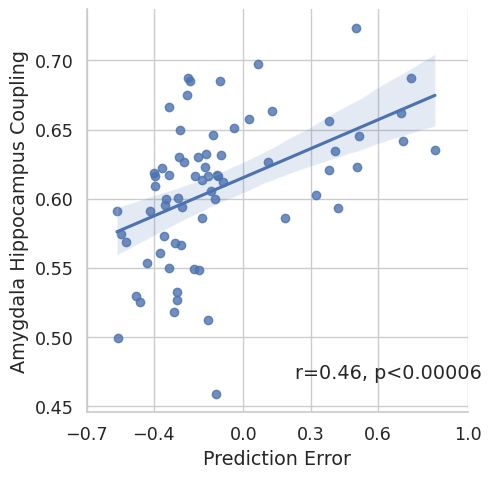

In [10]:
# Correlation with prediction erro 
# This is only for visualization purposes
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='amg_hipp', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala Hippocampus Coupling")
plt.text(0.23,0.47, "r=0.46, p<0.00006")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_coupling.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amg_hipp'])

,n,r,CI95%,p-val,BF10,power
pearson,69,0.242371,"[0.01, 0.45]",0.0448,1.079,0.524575


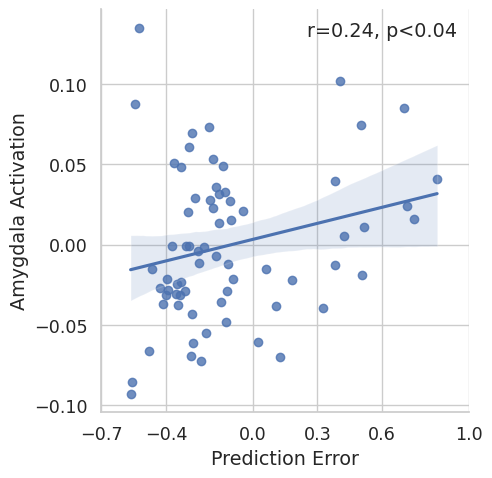

In [12]:
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='amgM', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala Activation")
plt.text(0.25,0.13, "r=0.24, p<0.04")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_amg.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amgM'])

,n,r,CI95%,p-val,BF10,power
pearson,69,-0.241324,"[-0.45, -0.0]",0.045761,1.061,0.520951


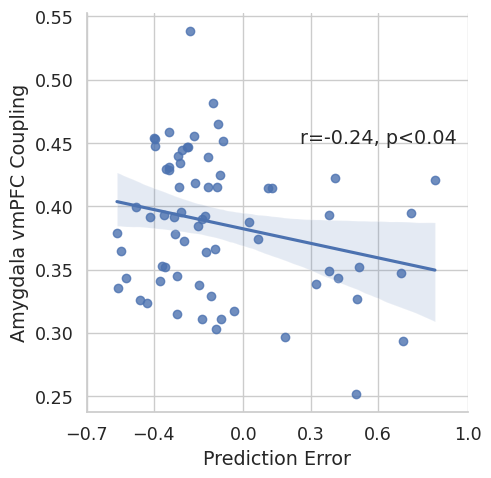

In [14]:
# vmpfc
# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='amg_vmpfc', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala vmPFC Coupling")
plt.text(0.25,0.45, "r=-0.24, p<0.04")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_couplingVMPFC.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amg_vmpfc'])

,n,r,CI95%,p-val,BF10,power
pearson,69,0.069379,"[-0.17, 0.3]",0.571081,0.176,0.087466


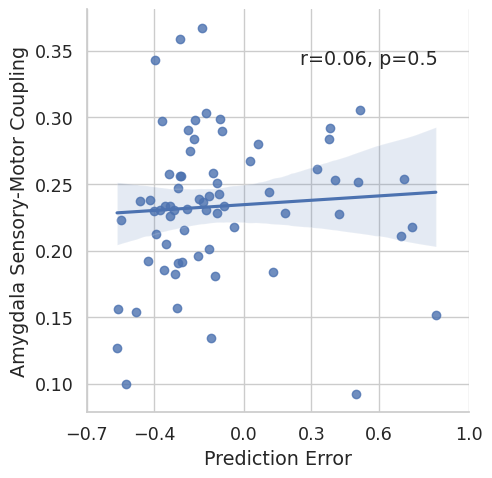

In [15]:
# sensorymotor cortex

# plot results
forPlot = df.groupby(['Event.Nr']).mean()
sns.set(font_scale = 1.15)
sns.set_style("whitegrid")
a = sns.lmplot(x ='pe', y='amg_SnM', data= forPlot)
a.set_axis_labels("Prediction Error")
a.set_ylabels("Amygdala Sensory-Motor Coupling")
plt.text(0.25,0.34, "r=0.06, p=0.5")

a.set(xlim = (-0.7,0.95))
a.set(xticks=np.linspace(-0.7, 0.95, 6).round(1))
a.savefig('pe_couplingSensoryMotor.png', dpi=300, bbox_inches='tight')
pg.corr(forPlot['pe'], forPlot['amg_SnM'])